In [ ]:
# We have a prediction problem here. Given some factors like age, year_of_treatment, active lymph nodes, We have to predict possibility of breast Cancer

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
haberman=pd.read_csv('/home/nikhil/Desktop/AppliedAI/EDA/haberman.csv',header=None,names=['age','year_of_treatment','positive_nodes','survival_status'])


In [3]:
print(haberman.size)

1224


In [4]:
print(haberman.shape)

(306, 4)


In [5]:
print(haberman.columns)

Index(['age', 'year_of_treatment', 'positive_nodes', 'survival_status'], dtype='object')


In [6]:
haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [7]:
#The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.
#The values of 'survival_status_after_5_years' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)
# modify the target column values to be meaningful as well as categorical
haberman['survival_status'] = haberman['survival_status'].map({1:"yes", 2:"no"})
haberman['survival_status'] = haberman['survival_status'].astype('category')
print(haberman.head())

   age  year_of_treatment  positive_nodes survival_status
0   30                 64               1             yes
1   30                 62               3             yes
2   30                 65               0             yes
3   31                 59               2             yes
4   31                 65               4             yes


In [8]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                  306 non-null int64
year_of_treatment    306 non-null int64
positive_nodes       306 non-null int64
survival_status      306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [9]:
print(haberman.describe())

              age  year_of_treatment  positive_nodes
count  306.000000         306.000000      306.000000
mean    52.457516          62.852941        4.026144
std     10.803452           3.249405        7.189654
min     30.000000          58.000000        0.000000
25%     44.000000          60.000000        0.000000
50%     52.000000          63.000000        1.000000
75%     60.750000          65.750000        4.000000
max     83.000000          69.000000       52.000000


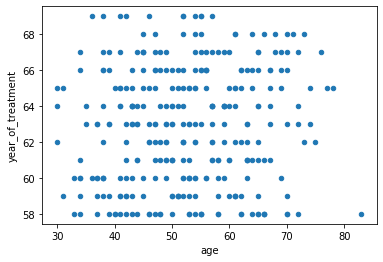

In [10]:
haberman.plot(kind='scatter',x='age',y='year_of_treatment');
plt.show()

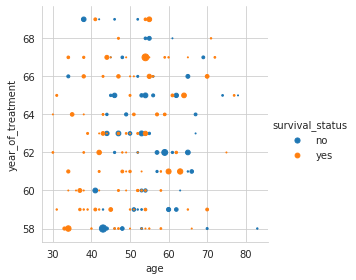

In [11]:
# A plot between year_of_treatment is the worst possible way to arive at any conclusion
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=4) \
   .map(plt.scatter, "age", "year_of_treatment","positive_nodes") \
   .add_legend();
plt.show();

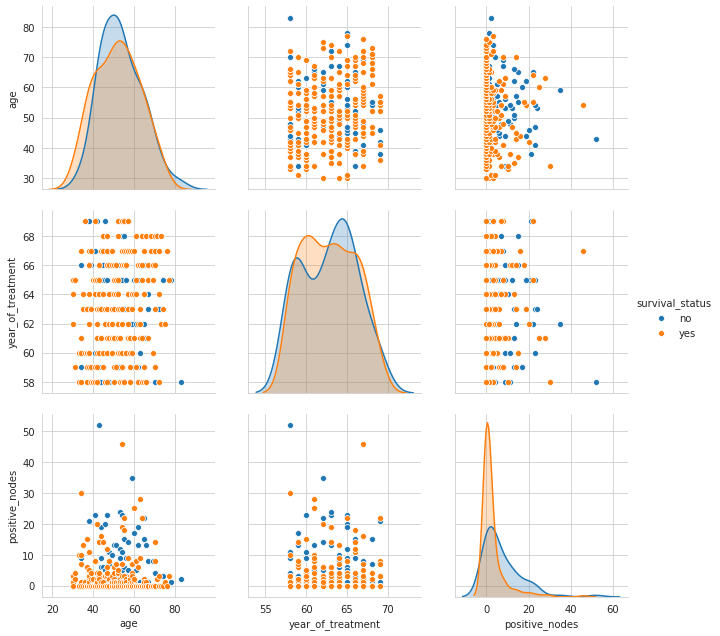

In [14]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", height=3);
plt.show()

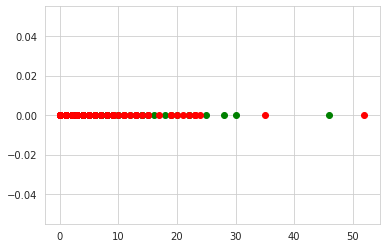

In [23]:
import numpy as np
haberman_yes = haberman.loc[haberman["survival_status"] == "yes"];
haberman_no = haberman.loc[haberman["survival_status"] == "no"];


plt.plot(haberman_yes["positive_nodes"], np.zeros_like(haberman_yes['positive_nodes']), 'go')
plt.plot(haberman_no["positive_nodes"], np.zeros_like(haberman_no['positive_nodes']), 'ro')


plt.show()

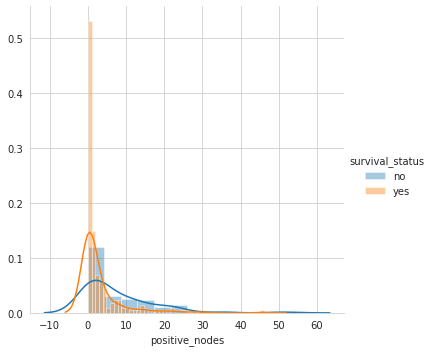

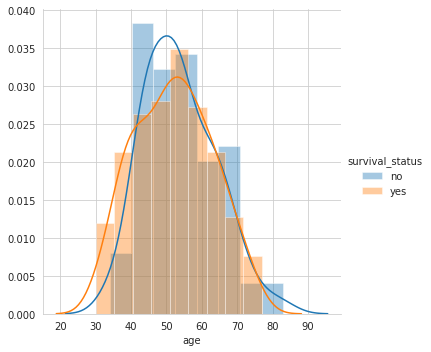

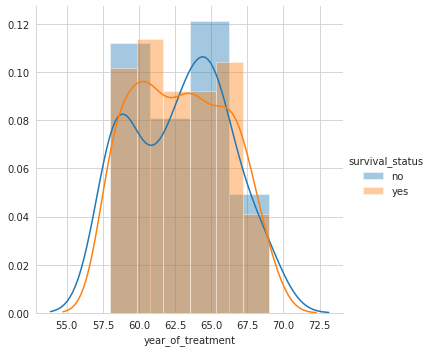

In [19]:
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "positive_nodes") \
   .add_legend();
plt.show();

sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "year_of_treatment") \
   .add_legend();
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


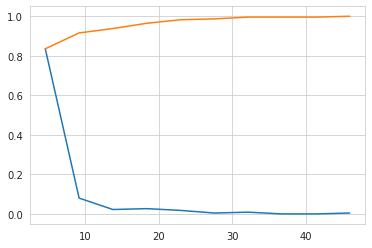

In [21]:
counts, bin_edges = np.histogram(haberman_yes['positive_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_yes['positive_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


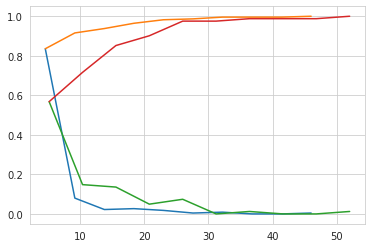

In [25]:
counts, bin_edges = np.histogram(haberman_yes['positive_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(haberman_no['positive_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()


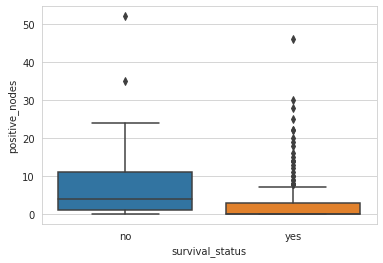

In [26]:
sns.boxplot(x='survival_status',y='positive_nodes', data=haberman)
plt.show()

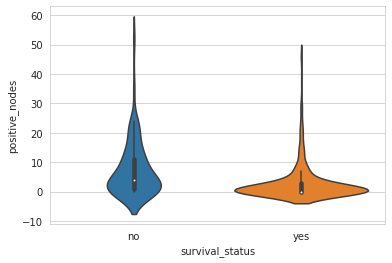

In [27]:
sns.violinplot(x="survival_status", y="positive_nodes", data=haberman, size=8)
plt.show()

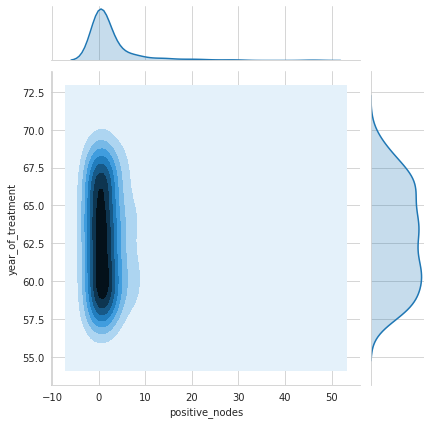

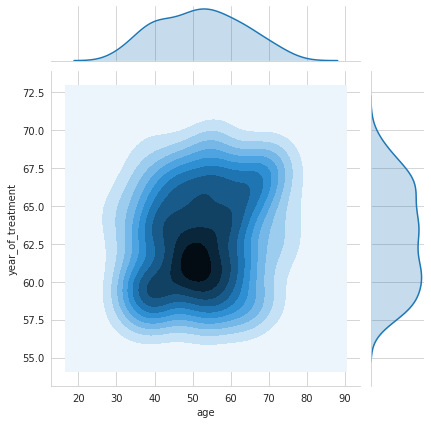

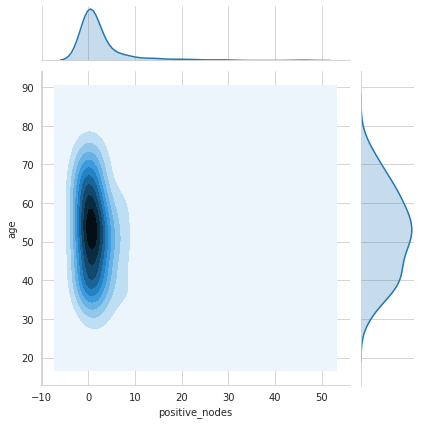

In [31]:
sns.jointplot(x="positive_nodes", y="year_of_treatment", data=haberman_yes, kind="kde");
plt.show();
sns.jointplot(x="age", y="year_of_treatment", data=haberman_yes, kind="kde");
plt.show();
sns.jointplot(x="positive_nodes", y="age", data=haberman_yes, kind="kde");
plt.show();


In [32]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_yes["positive_nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_yes["positive_nodes"],50)));
print(np.mean(haberman_no["positive_nodes"]))


print("\nStd-dev:");
print(np.std(haberman_yes["positive_nodes"]))
print(np.std(haberman_no["positive_nodes"]))



#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_yes["positive_nodes"]))
#Median with an outlier
print(np.median(np.append(haberman_yes["positive_nodes"],50)));
print(np.median(haberman_no["positive_nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman_yes["positive_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_no["positive_nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_yes["positive_nodes"],90))
print(np.percentile(haberman_no["positive_nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_yes["positive_nodes"]))
print(robust.mad(haberman_no["positive_nodes"]))



Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408
